<a href="https://colab.research.google.com/github/Nicolas-Flores-22/Detection-Pishing/blob/main/MACHINE_LEARNINGN_DETECTION_PHISHIN_OF_URL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# <center> <font color='red'>**DETECTION PISHING OF URL**</font></center>

Montamos Google Drive en Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importamos las bibliotecas necesarias

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
# plot_confusion_matrix (para visualizar una matriz de confusión), plot_roc_curve (para visualizar una curva ROC)
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve 
# roc_auc_score(para calcular el área bajo la curva ROC), roc_curve ( para visualizar una curva ROC)
from sklearn.metrics import roc_auc_score, roc_curve 
import matplotlib.pyplot as plt


Cargamos los datos de un dataframe de Pandas

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset.csv')
data.describe()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,5528.000000,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,3191.447947,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2764.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5528.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8291.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11055.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Dividir los datos en conjuntos de entrenamiento y prueba
X = data.drop("Result", axis=1)

# convertir la columna "Result" en una matriz de una sola columna con valores binarios 0 y 1
y = pd.get_dummies(data["Result"]).iloc[:, 1].values
z=pd.DataFrame(y)
print(z)

       0
0      0
1      0
2      0
3      0
4      1
...   ..
11050  1
11051  0
11052  0
11053  0
11054  0

[11055 rows x 1 columns]


In [ ]:
from sklearn.metrics import accuracy_score

#y = data["Result"]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#realizar el split de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # 30 o 40 recomendado

## <center> <font color='4cc9f0'>RANDOM FOREST</font> </center>



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


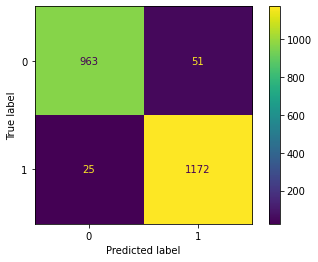

Random Forest Accuracy: 96.56%


In [ ]:
#Entrenar un modelo de Random Forest
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

#Hacer predicciones de Random Forest
rf_pred = clf.predict(X_test)

#Trazar la matriz de confusión para de Random Forest
plot_confusion_matrix(clf, X_test, y_test)
plt.show()

#Trazar las curvas de aprendizaje para de Random Forest
                                                                                              
# #Calcular la precisión de Random Forest
rf_acc = accuracy_score(y_test, rf_pred)

# #Imprimir los resultados de Random Forest
print("Random Forest Accuracy: {:.2f}%".format(rf_acc * 100))

## <center> <font color='4cc9f0'>SVC</font> </center>

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


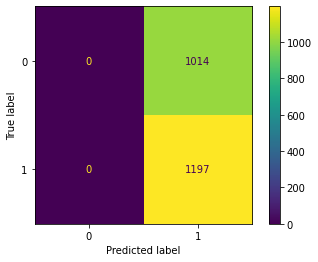

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


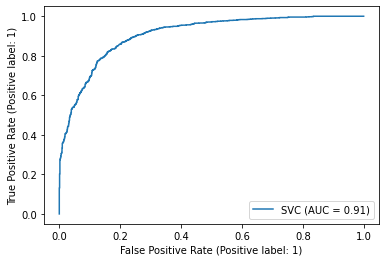

SVC Accuracy: 54.14%


In [ ]:
#Entrenar un modelo SVC
svc = SVC(probability=True)
svc.fit(X_train, y_train)

#Hacer predicciones utilizando SVC
svc_pred = svc.predict(X_test)

#Trazar la matriz de confusión para SVC
plot_confusion_matrix(svc, X_test, y_test)
plt.show()

# #Calcular la precisión para SVC
svc_acc = accuracy_score(y_test, svc_pred)

#Trazar las curvas de aprendizaje para SVC
plot_roc_curve(svc, X_test, y_test)
plt.show()

# #Imprimir los resultados DE SVC
print("SVC Accuracy: {:.2f}%".format(svc_acc * 100))

## <center> <font color='4cc9f0'> DECISION TREE </font> </center>

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


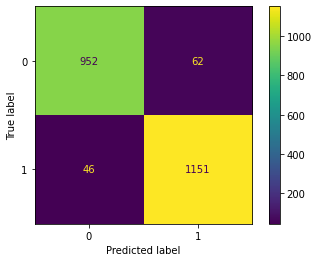

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


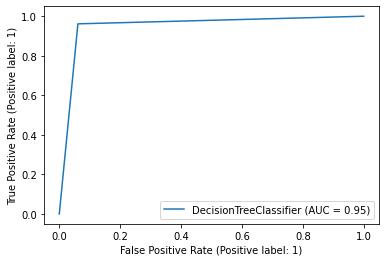

Decision Tree Accuracy: 95.12%


In [ ]:
#Entrenar un modelo de Decision Tree
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

#Hacer predicciones utilizando de Decision Tree
tree_pred = tree.predict(X_test)

#Trazar la matriz de confusión de Decision Tree
plot_confusion_matrix(tree, X_test, y_test)
plt.show()

#Trazar las curvas de aprendizaje para Decision Tree
plot_roc_curve(tree, X_test, y_test)
plt.show()

# #Calcular la precisión para Decision Tree
tree_acc = accuracy_score(y_test, tree_pred)

# #Imprimir los resultados  para Decision Tree
print("Decision Tree Accuracy: {:.2f}%".format(tree_acc * 100))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


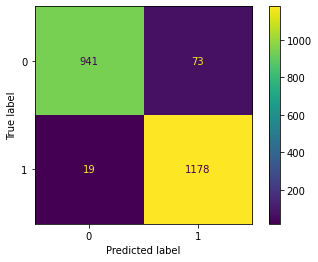

Ensemble Accuracy: 95.84%


In [ ]:
#Clasificador de votaciones
from sklearn.ensemble import VotingClassifier

#Crear un objeto VotingClassifier
ensemble = VotingClassifier(estimators=[('rf', clf), ('svc', svc), ('tree', tree)], voting='hard')

#Entrenar el modelo devotación
ensemble.fit(X_train, y_train)

#Hacer predicciones utilizando el modelo de votación
ensemble_pred = ensemble.predict(X_test)

#Trazar la matriz de confusión para el modelo de votación
plot_confusion_matrix(ensemble, X_test, y_test)
plt.show()

# #Calcular la precisión para modelo de votación
ensemble_acc = accuracy_score(y_test, ensemble_pred)

# #Imprimir los resultados para  modelo de votación
print("Ensemble Accuracy: {:.2f}%".format(ensemble_acc * 100))

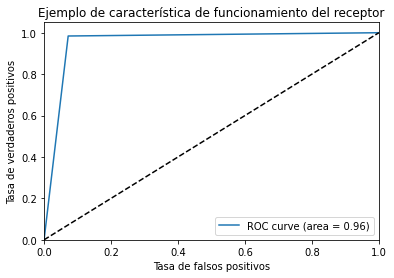

In [ ]:
#Trazar la curva ROC para el modelo de votación
from sklearn.metrics import roc_auc_score, roc_curve

#Calcular el área bajo la curva ROC
fpr, tpr, _ = roc_curve(y_test, ensemble_pred)
roc_auc = roc_auc_score(y_test, ensemble_pred)

#Trazar la curva ROC
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Ejemplo de característica de funcionamiento del receptor')
plt.legend(loc="lower right")
plt.show()

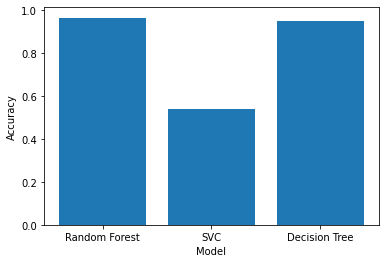

In [ ]:
# Cree un gráfico de barras de la precisión de cada modelo
model_accuracies = [rf_acc, svc_acc, tree_acc]
model_names = ['Random Forest', 'SVC', 'Decision Tree']
plt.bar(model_names, model_accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()